In [32]:
import nltk.tokenize 
import pandas as pd
fullText = pd.read_csv('MainData_Turkish3.csv',encoding = 'utf-8',delimiter=',') #fullText
#print(fullText)
#all the value of our csv file in column 0 means our disease discription 
diseaseDescription = fullText.iloc[:,0]
#diseaseDescription
#all the value of our csv file in column 1 means our label 
#diseaseName = fullText.iloc[:,1]
#diseaseName

In [33]:
#CHANGE TO LOWERCASE
diseaseDescription = [item.lower() for item in diseaseDescription]


In [34]:
#remove white space from start and end of strings
diseaseDescription = [item.strip('') for item in diseaseDescription]
#diseaseDescription

In [35]:
#remove puncutations from diseaseDescription lists
import string
punc = string.punctuation
#print(punc)

diseaseDescriptionListAfterPunctuation = [''.join(char for char in eachItem if char not in string.punctuation) for eachItem in diseaseDescription]
#diseaseDescriptionListAfterPunctuation

In [36]:
#method two is the best for this case
#https://github.com/ahmetax/trstop/blob/master/dosyalar/turkce-stop-words
filee = open("turkishStopWords.txt", "r",encoding="utf-8")
turkishStopWords = filee.read()
turkishStopWords = turkishStopWords.split(',')
# print(turkishStopWords)
# for item in turkishStopWords: 
#     print(item) 

cleanedData_FromStopWords = [' '.join(w for w in word.split() if w not in turkishStopWords) for word in diseaseDescriptionListAfterPunctuation]
#print(cleanedData_FromStopWords)

listt = [item + ',|' for item in cleanedData_FromStopWords]
#listt

In [37]:
# first off all install zeyrek(for lemmitization) which is part of zembrek library
#pip install zeyrek into your env variable
import zeyrek
analyzer = zeyrek.MorphAnalyzer()
#print(analyzer.lemmatize('incelendi')[0][1][0])
Lemmatized_data = [analyzer.lemmatize(item) for item in listt]
#print(Lemmatized_data)

FinishedList = []
for item in Lemmatized_data:
    for member in item:
        FinishedList.append(member[1][0])
                
#print(FinishedList)

bad_char = [',']
resulttt = ' '.join(char for char in FinishedList if not char in bad_char) 
#resulttt
newlist =resulttt.split("|")
#print(newlist)
#remove last index which have just '' item

X = newlist[:-1]
#print(newlist)
#print(len(newlist))
#print(len(diseaseName))




In [38]:
# Load Data Viz Pkgs
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs
# !pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#show the full columns title with the first 5 rows
#fullText.head()

#show row 0 means the first row
#fullText.loc[0].EndoscopyReportdescription

#show all titles type the first column type is object and the others are int64 
#fullText.dtypes


#type 1 chart-drawing Value Count for AL POLİPOZİS column  as chart  (it show 147 row have value 0 and one row has value 1)
#sns.countplot(fullText['AL POLİPOZİS'])

#type 2 chart-drawing Value Count for AL POLİPOZİS column  as bar chart
#fullText['AL POLİPOZİS'].value_counts().plot(kind='bar')

# see how much value we have in this case show as numbers
#fullText['AL POLİPOZİS'].value_counts()

tfidf = TfidfVectorizer()
# Build Features
Xfeatures = tfidf.fit_transform(X).toarray()
#Xfeatures
y = fullText[['AL POLİPOZİS','ALKALEN REFLÜ GASTRİT','HİATAL YETMEZLİK','ANASTOMOZ ÜLSERİ','HİATAL HERNİ','ANTRAL GASTRİT','ANTRUMDA ÜLSER','KORPUSTA POLİPOİD LEZYONLAR','KARDIADA HIPEREMIK ALAN','LES GEVŞEKLİĞİ','ANTRUM VE FUNDUSTA POLİPLER','ANTRUMDA HİPERTROFİK LEZYON','GEVŞEK KARDİA','HİPOTONİK MİDE','HİYATAK HERNİ','POLIP','BULBİT','DUODENAL ÜLSER','REFLÜ ÖZOFAJİT','ANTRAL POLİPOZİS','ATROFIK GASTRİT','BULBUSDA ÜLSER','DİSTAL ÖZEFAJİT','PANGASTRİT','DUODENUM BULBUS ÜLSER','HEMORAJİK EROZİV PANGASTRİT','EROSİV PANGASTRİT','POST BULBER POLİP','EROZİV GASTRİT','FUNDAL GASTRİT','FUNDUSTA POLİPOİD LEZYONLAR','ALKALEN REFLU','SALİMANASTOMOZ HATTI','NATRAL POLİP','KORPUSTA MALİGN GÖRÜNÜMLÜ ÜLSER','MİDE FUNDUS VE KARDİADA MULTİBL POLİOPLERİ ANTRAL GASTRİT','MİDE FUNDUSTA POLİPLER','MİDEDE GIDA ARTIKLARI','MİDEDE SEKRESYON','MİNİMAL HİATAL HERNİ','NORMAL ENDOSKOPİK BULGULAR','NORMAL GASTROSKOPİK BULGULAR','ÖZEFAGUS ALT UÇTA VARİS','BULBUSTA POLİP','PREPİPORİK KÜÇÜK KURVATUR','ANTRUM MUKOZASI HİPEREMİK VE ÖDEMLİ','SALİM ANASTOMOZ HATTI','TANI YOK','PYLORDA POLIPOD KABALAŞMA','ANTRAL GASTRİT PYLORIT']]
#print(y)


# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.1,random_state=42)
#print(fullText['EndoscopyReportdescription'].shape)
#print(X_train.shape)


# Building Our Model
# Estimator + Multilabel Estimator
### Problem Transform
import skmultilearn


# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)


BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [20]:
# Predictions
binary_prediction = binary_rel_clf.predict(X_test)
#binary_prediction

In [21]:
# Convert to Array  To See Result
#binary_prediction.toarray()

In [22]:
# Accuracy
A = accuracy_score(y_test,binary_prediction)*100
A

46.666666666666664

In [23]:

# Hamming Loss :Incorrect Predictions
# The Lower the result the better
L = hamming_loss(y_test,binary_prediction)*100
L

2.2666666666666666

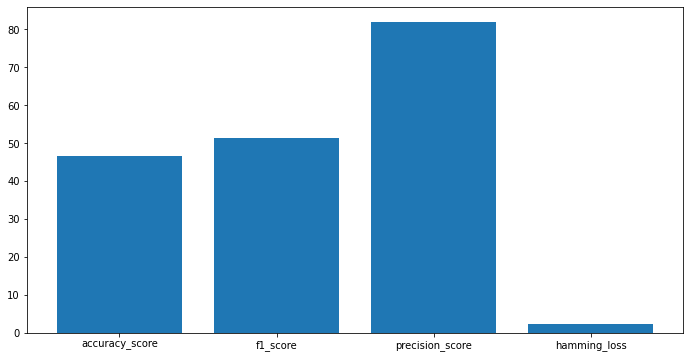

 accuracy_score = 46.666666666666664 
 f1_score =  51.42857142857142 
 precision_score =  81.81818181818183 
 hamming_loss =  2.2666666666666666


In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

B = f1_score(y_test, binary_prediction,average='micro')*100
C =precision_score(y_test, binary_prediction,average='micro')*100

#print('accuracy_score = ',A)
#print('f1_score = ',B)
#print('precision_score = ',C)

import matplotlib.pyplot as plt
names = ['accuracy_score', 'f1_score', 'precision_score', 'hamming_loss']
values = [A, B, C, L]
plt.figure(figsize=(40, 6))
plt.subplot(131)
plt.bar(names, values)
plt.show()
print(' accuracy_score =', A,'\n' ,'f1_score = ', B,'\n' ,'precision_score = ',C,'\n' ,'hamming_loss = ', L)